In [44]:
import pandas as pd

data = pd.read_csv("house_prices.csv", index_col=0)
# data = data.sample(frac=0.5, random_state=0),
data

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...
168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


In [45]:
data = data[data["Area_in_Marla"] > 0]
data

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...
168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


In [46]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, random_state=0)
test_data, valid_data = train_test_split(test_data, test_size=0.5, random_state=0)
train_data.shape[0], valid_data.shape[0], test_data.shape[0]

(69642, 14924, 14923)

In [47]:
features = [
    "property_type",
    "location",
    "city",
    "baths",
    "bedrooms",
    "Area_in_Marla",
]

train_data[features]

,property_type,location,city,baths,bedrooms,Area_in_Marla
63850,Lower Portion,E-11,Islamabad,3,2,16.0
42954,House,Bhara kahu,Islamabad,6,5,10.0
48558,Flat,Jamshed Road,Karachi,2,3,3.3
86067,Flat,DHA Defence,Karachi,3,3,7.6
114639,Flat,9th Avenue,Islamabad,4,3,12.7
...,...,...,...,...,...,...
30619,Flat,E-11,Islamabad,2,2,6.2
69580,House,Paragon City,Lahore,4,3,5.0
64399,House,DHA Defence,Lahore,3,4,20.0
65832,House,Central Park Housing Scheme,Lahore,5,5,20.0


In [48]:
train_data["property_type"].value_counts()

property_type
House            40675
Flat             18755
Upper Portion     5961
Lower Portion     3824
Penthouse          185
Room               177
Farm House          65
Name: count, dtype: int64

In [49]:
train_data["location"].value_counts()

location
DHA Defence               8253
Bahria Town Karachi       4666
Bahria Town Rawalpindi    3690
Bahria Town               3119
Gulistan-e-Jauhar         2460
                          ... 
Mian Aziz Garden             1
Cantt View Society           1
TECH Society                 1
Dream Villas                 1
Gulshan-e-Safeer             1
Name: count, Length: 1307, dtype: int64

In [50]:
train_data["city"].value_counts()

city
Karachi       26010
Lahore        18390
Islamabad     15445
Rawalpindi     8212
Faisalabad     1585
Name: count, dtype: int64

In [51]:
label = "price"
train_data[label]

63850        50000
42954     15000000
48558        25000
86067     22000000
114639       85000
            ...   
30619        53500
69580      9600000
64399     40000000
65832     30000000
108080     9200000
Name: price, Length: 69642, dtype: int64

In [52]:
from sklearn.preprocessing import StandardScaler

label_tfm = StandardScaler()
label_tfm.fit(train_data[label].to_frame())

train_data[label] = label_tfm.transform(train_data[label].to_frame())
valid_data[label] = label_tfm.transform(valid_data[label].to_frame())
test_data[label] = label_tfm.transform(test_data[label].to_frame())

train_data[label]

63850    -0.971030
42954     0.431292
48558    -0.973375
86067     1.087897
114639   -0.967747
            ...   
30619    -0.970702
69580    -0.075233
64399     2.776311
65832     1.838303
108080   -0.112753
Name: price, Length: 69642, dtype: float64

In [53]:
from sklearn.dummy import DummyRegressor

baseline = DummyRegressor(strategy="mean")
baseline.fit(train_data[features], train_data[label])

score = baseline.score(test_data[features], test_data[label])
print(f"{score:.3f}")

-0.000


In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer as TfidfVec
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

def create_pipeline():
    return make_pipeline(
        make_column_transformer(
            # https://scikit-learn.org/stable/modules/preprocessing.html
            (OneHotEncoder(min_frequency=0.1), ["property_type"]),
            (TfidfVec(ngram_range=(1, 3), min_df=5, max_df=0.5), "location"),
            (OneHotEncoder(min_frequency=0.1), ["city"]),
            (StandardScaler(), ["baths"]),
            (StandardScaler(), ["bedrooms"]),
            (StandardScaler(), ["Area_in_Marla"]),
            remainder="passthrough",
        ),
        # https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
        SGDRegressor(random_state=0),
    )

pipeline = create_pipeline()
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder-1',
                                                  OneHotEncoder(min_frequency=0.1),
                                                  ['property_type']),
                                                 ('tfidfvectorizer',
                                                  TfidfVectorizer(max_df=0.5,
                                                                  min_df=5,
                                                                  ngram_range=(1,
                                                                               3)),
                                                  'location'),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(min_frequency=0.1),
                                                  ['city']),
                                                 ('standardscaler-1',
                                                  StandardScaler(), ['baths']),
                                                 ('standardscaler-2',
                                                  StandardScaler(),
                                                  ['bedrooms']),
                                                 ('standardscaler-3',
                                                  StandardScaler(),
                                                  ['Area_in_Marla'])])),
                ('sgdregressor', SGDRegressor(random_state=0))])

In [55]:
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

params = dict(
    sgdregressor__penalty=["l2", "l1", "elasticnet"],
    sgdregressor__alpha=[0.0001, 0.001, 0.00001], 
    sgdregressor__l1_ratio=[0.1, 0.5, 0.9],
)

# https://scikit-learn.org/stable/modules/grid_search.html
search = RandomizedSearchCV(pipeline, params, n_iter=10, random_state=0)
search.fit(train_data[features], train_data[label])
search.best_params_, f"{search.best_score_:.3f}"

({'sgdregressor__penalty': 'l2',
  'sgdregressor__l1_ratio': 0.9,
  'sgdregressor__alpha': 1e-05},
 '0.414')

In [56]:
search.best_estimator_.steps[-1][1].n_features_in_

1633

In [57]:
from sklearn.inspection import permutation_importance as per_imp

imps = per_imp(search.best_estimator_, valid_data[features], valid_data[label], random_state=0)
imps = pd.Series(imps.importances_mean, index=features).sort_values(ascending=False)
imps

city             0.173401
baths            0.135246
location         0.119826
property_type    0.064468
bedrooms         0.046681
Area_in_Marla    0.001225
dtype: float64

In [58]:
samples = valid_data.sample(5, random_state=0)
samples[label] = label_tfm.inverse_transform(samples[label].values.reshape(-1, 1))
samples

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
43357,Flat,2000000.0,Johar Town,Lahore,1,For Sale,1,1.2
26563,House,15000000.0,Satiana Road,Faisalabad,6,For Sale,5,10.0
135667,House,65000.0,I-10,Islamabad,3,For Rent,4,6.7
24305,Flat,16500000.0,Hill Park,Karachi,3,For Sale,2,6.4
54829,Flat,10000000.0,DHA Defence,Karachi,2,For Sale,2,4.2


In [59]:
predicted = search.best_estimator_.predict(samples)
predicted = label_tfm.inverse_transform(predicted.reshape(-1, 1))
predicted

array([[ 6210048.68308893],
       [13668526.23791179],
       [ 6569066.43784819],
       [ 4962762.0816487 ],
       [ 6987043.71545895]])

In [65]:
sample = {
    "city": "Lahore",
    "location": "DHA Defence",
    "property_type": "House",
    "baths": 5,
    "bedrooms": 5,
    "Area_in_Marla": 20.0,
}

sample = pd.DataFrame([sample])
predicted = search.best_estimator_.predict(sample)
label_tfm.inverse_transform([predicted])[0][0]

22986707.870073874

In [66]:
sample = {
    "city": "Lahore",
    "location": "DHA Defense",
    "property_type": "House",
    "baths": 5,
    "bedrooms": 5,
    "Area_in_Marla": 20.0,
}

sample = pd.DataFrame([sample])
predicted = search.best_estimator_.predict(sample)
label_tfm.inverse_transform([predicted])[0][0]

21173960.51126247

In [62]:
from sklearn.model_selection import cross_val_score

pipeline = create_pipeline()
pipeline.set_params(**search.best_params_)

# https://scikit-learn.org/stable/modules/cross_validation.html
scores = cross_val_score(pipeline, train_data[features], train_data[label], cv=5)
scores

array([0.40794698, 0.41389821, 0.42385614, 0.41750888, 0.40830244])

In [63]:
score = scores.mean()
print(f"{score:.3f}")

0.414


(0.0, 1.0)

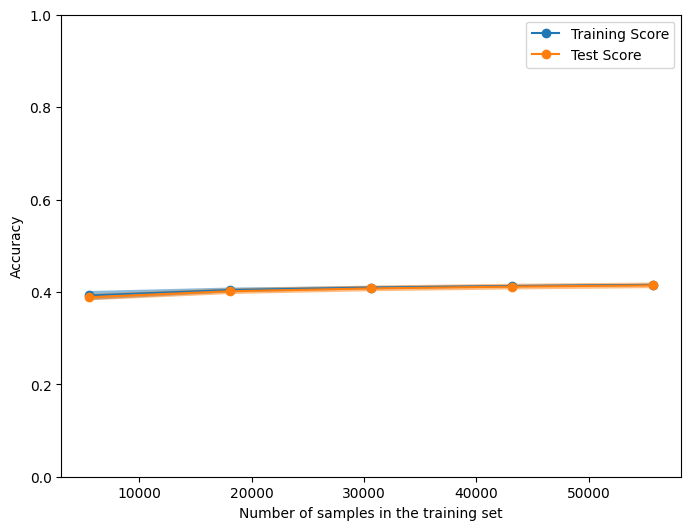

In [64]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(figsize=(8, 6), sharey=True)

pipeline = create_pipeline()
pipeline.set_params(**search.best_params_)

LearningCurveDisplay.from_estimator(
    estimator=pipeline,
    X=train_data[features],
    y=train_data[label],
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    score_type="both",
    line_kw={"marker": "o"},
    std_display_style="fill_between",
    score_name="Accuracy",
    ax=ax,
)

handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ["Training Score", "Test Score"])
ax.set_ylim(ymin=0, ymax=1)